In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('articles.csv')
df.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,politics,Politico,0,https://www.politico.com/news/magazine/2019/11...,Can the Impeachment Hearings Actually Change A...,2019-11-13,NaN,"This happens for different reasons , but a key...","This happens for different reasons, but a key ...",www.politico.com,left,bpp2Cqpvyi2ER5Lr
1,china,Bloomberg,1,https://www.bloomberg.com/news/articles/2018-0...,Trump’s Tariff Barrage Pushes China Fight to P...,2018-07-11,"Brendan Scott, Enda Curran",LISTEN TO ARTICLE 5:37 SHARE THIS ARTICLE Shar...,LISTEN TO ARTICLE 5:37 SHARE THIS ARTICLE Shar...,www.bloomberg.com,center,PnVV1v7F0D8bhd5X
2,terrorism,Washington Times,2,http://www.washingtontimes.com/news/2014/sep/1...,Top general: Failed Foley rescue was ‘highest-...,2014-09-16,Stephen Dinan,The Pentagon ’ s top general said Tuesday that...,The Pentagon’s top general said Tuesday that t...,www.washingtontimes.com,right,pZlutCuZNm832qqK
3,politics,Salon,0,http://www.salon.com/2014/11/12/americas_post_...,America’s post-midterm inferno: Tea Party garb...,2014-11-12,Robert Hennelly,A full week after the alleged “ shellacking “ ...,A full week after the alleged “shellacking “ o...,www.salon.com,left,aMGkvFlpLyQrX6iu
4,politics,CNN (Web News),0,http://www.cnn.com/2014/01/08/politics/christi...,E-mails among Christie appointees suggest poli...,2014-01-08,Catherine E. Shoichet,Story highlights Gergen : `` It feeds into thi...,"Story highlights Gergen: ""It feeds into this n...",www.cnn.com,left,Ludq48gCzDiKtnmX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37554 entries, 0 to 37553
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   topic             37554 non-null  object
 1   source            37554 non-null  object
 2   bias              37554 non-null  int64 
 3   url               37554 non-null  object
 4   title             37554 non-null  object
 5   date              33147 non-null  object
 6   authors           27886 non-null  object
 7   content           37554 non-null  object
 8   content_original  37554 non-null  object
 9   source_url        37554 non-null  object
 10  bias_text         37554 non-null  object
 11  ID                37554 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.4+ MB


In [4]:
df['num_words'] = df['content'].apply(lambda x: len(x.split()))

In [5]:
df['num_words'].describe()

count    37554.000000
mean      1084.226714
std        750.744013
min         26.000000
25%        619.000000
50%        916.000000
75%       1301.000000
max       9703.000000
Name: num_words, dtype: float64

In [6]:
num_words_by_bias = df.loc[:, ['bias_text', 'num_words']].groupby('bias_text').mean()
num_words_by_bias

,num_words
bias_text,
center,1081.309200
left,1250.168320
right,929.390709


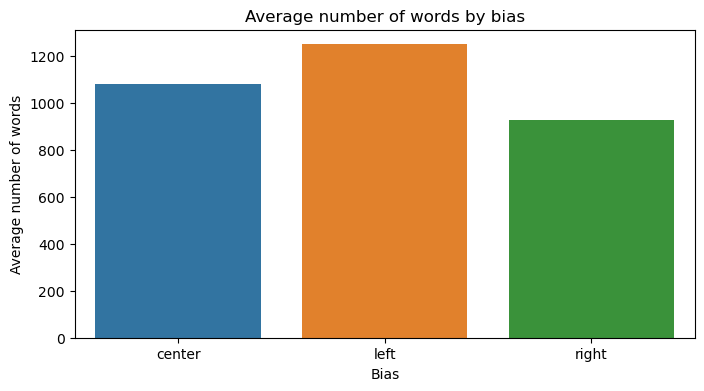

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=num_words_by_bias.index, y=num_words_by_bias['num_words'], ax=ax)
ax.set_title('Average number of words by bias')
ax.set_ylabel('Average number of words')
ax.set_xlabel('Bias')
plt.show()

In [20]:
large_publishers = df[['source', 'title']].groupby('source') \
                                            .count() \
                                                .rename(columns={'title': 'num_articles'}) \
                                                    # .sort_values('num_articles', ascending=False) 

large_publishers = large_publishers[large_publishers['num_articles'] > 150]
large_publishers, len(large_publishers)

(                            num_articles
 source                                  
 ABC News                             341
 American Spectator                   310
 Associated Press                     391
 BBC News                             886
 Bloomberg                            178
 Breitbart News                       465
 CBN                                  504
 CBS News                             164
 CNN (Web News)                      2905
 Christian Science Monitor           1300
 Daily Beast                          240
 Fox News                            1356
 Fox Online News                     2047
 Guest Writer - Left                  180
 Guest Writer - Right                 465
 NPR Online News                     2012
 National Review                     1014
 New York Post                        179
 New York Times - News               1417
 Newsmax                              671
 Politico                            2493
 Reason                           

In [36]:
lst_large_pubs = large_publishers.index.tolist()
df_large_pubs = df[df['source'].isin(lst_large_pubs)]
bias_by_src = df_large_pubs[['source', 'bias']].groupby('source') \
                                                .mean() \
                                                .rename(columns={'bias': 'avg_bias'})  \
                                                # .sort_values('num_articles', ascending=False)
bias_by_src['publisher'] = bias_by_src.index
# bias_by_src = pd.DataFrame(bias_by_src, columns=['avg_bias'])
bias_by_src.reset_index(drop=True, inplace=True)
bias_by_src['Num Articles'] = large_publishers['num_articles'].values
bias_by_src.sort_values('Num Articles', ascending=False)

,avg_bias,publisher,Num Articles
8,0.0,CNN (Web News),2905
36,2.0,Washington Times,2886
20,0.0,Politico,2493
12,2.0,Fox Online News,2047
15,1.0,NPR Online News,2012
32,1.0,USA TODAY,1791
34,0.0,Vox,1460
18,0.0,New York Times - News,1417
29,1.0,The Hill,1377
11,2.0,Fox News,1356


In [10]:
df[(df['source'] == 'Fox News') & (df['bias'] == 1)].head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID,num_words


In [11]:
df.loc[19079, 'date'] = '2007-03-19'

In [12]:
df.loc[df['source'] == 'Brookings Institution', :].sort_values('date', ascending=True).head()
df.loc[30576, 'date'] = '2013-03-09'

In [13]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['year'] = df['date'].dt.year

In [14]:
remove_date_outliers = df.drop(df[(df['year'] == 2001) | (df['year'] == 2050)].index)

In [15]:
yearly_avg_bias = remove_date_outliers[['year', 'bias']].groupby('year').mean()
yearly_avg_bias

,bias
year,
2007.0,0.500000
2010.0,1.000000
2012.0,0.925455
2013.0,1.005310
2014.0,0.983266
2015.0,0.880495
2016.0,0.986889
2017.0,1.121926
2018.0,1.134968


/Users/wesleyallen/anaconda3/envs/CSCI_4022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wesleyallen/anaconda3/envs/CSCI_4022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


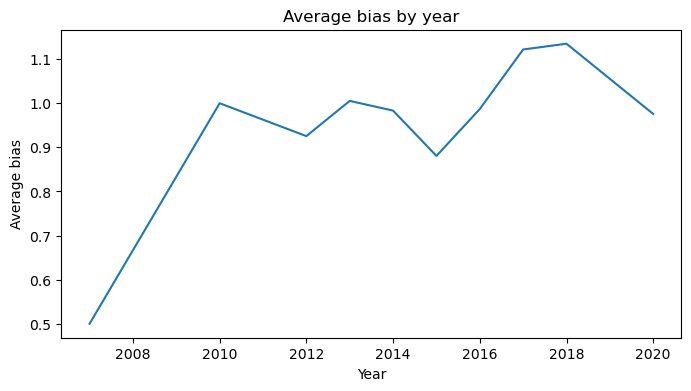

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=yearly_avg_bias.index, y=yearly_avg_bias['bias'], ax=ax)
ax.set_title('Average bias by year')
ax.set_ylabel('Average bias')
ax.set_xlabel('Year')
plt.show()